In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.41


In [27]:
def build(robot):
    
    center_y=13
    center_x=18
    
    
    box1=Box(robot,center_x+.6,center_y,angle=90,name='right')  # location given, width=height=1.0 default
    box2=Box(robot,center_x-.6,center_y,angle=90,name='left')
    box3=Box(robot,center_x+.6,center_y-1.1,angle=90,name='top')  # location given, width=height=1.0 default
    box4=Box(robot,center_x-.6,center_y-1.1,angle=90,name='bottom')

    connect(box1,box2,'weld')
    connect(box2,box3,'weld')
    connect(box3,box4,'weld')

    return robot



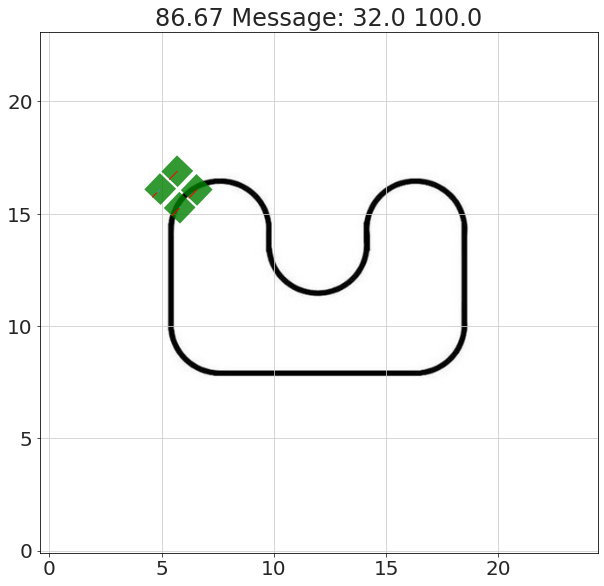

In [28]:
def act_forward_line(t,robot):

    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)

    scale=1
    if cl[0]<50:
        robot['left'].F=-1/scale
    else:
        robot['left'].F=4/scale
            
    if cr[0]<50:
        robot['right'].F=-1/scale
    else:
        robot['right'].F=4/scale
        
    
        
    robot.message=str(cl[0])+" "+str(cr[0])

env=FrictionEnvironment(image='images/track.png',
               linearDamping=10)  # size of the environment
robot=Robot(env)

robot=build(robot)

run_sim(env,act_forward_line,
        total_time=1000,  # seconds
        dt=1/60,
        dt_display=2,  # make this larger for a faster display
       )

### back to line following

In [32]:
def forward(t,robot):
    robot['left'].F=4
    robot['right'].F=4
    return True

def backward(t,robot):
    robot['left'].F=-1
    robot['right'].F=-1
    return True

def adjust_left(t,robot):
    robot['left'].F=-1
    robot['right'].F=4
    return True

def adjust_right(t,robot):
    robot['left'].F=4
    robot['right'].F=-1
    return True

def choose_direction(t,robot):
    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)
    
    left_black=cl[0]<50  # left black
    right_black=cr[0]<50  # left black
    
    left_white=not left_black
    right_white=not right_black
    
    if left_black and right_white:
        return 'adjust_left'

    if left_white and right_black:
        return 'adjust_right'

    if left_white and right_white:
        return 'forward'
    
    if left_black and right_black:
        return 'backward'
    
    robot.message='BAD'
    return '_end_simulation'  # shouldn't ever get here

    
    
    
state_machine_follow_line=StateMachine(
    (choose_direction,'_end_simulation'),  # until black will branch
    (forward,'choose_direction'),
    (adjust_left,'choose_direction'),
    (adjust_right,'choose_direction'),
    (backward,'choose_direction'),
)
    
    

def monitor(t,robot):
    cl=floor(robot['left'].read_color()*100)
    cr=floor(robot['right'].read_color()*100)
    
    robot.message=robot.controller.current_state+" "+str(cl[0])+" "+str(cr[0])





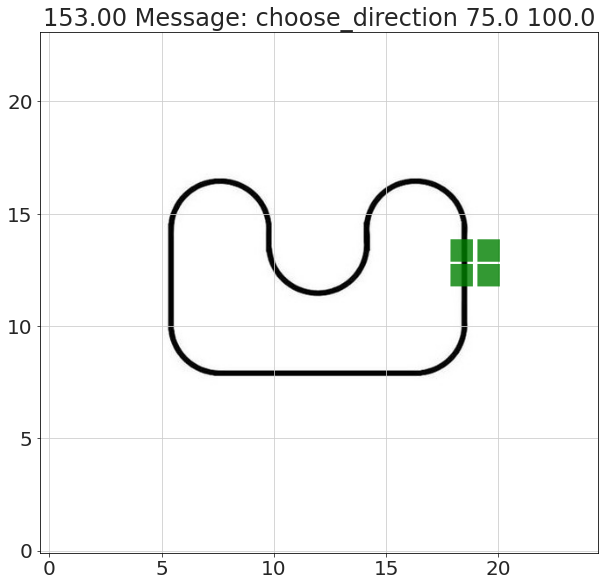

In [33]:

env=Environment(image='images/track.png',
               linearDamping=10)  # size of the environment
robot=Robot(env)

robot=build(robot)

robot.controller=Controller(state_machine_follow_line)
robot.controller.monitor=monitor



run_sim(env,robot.controller,
        total_time=250,  # seconds
        dt=1/60,
        dt_display=2,  # make this larger for a faster display
        plot_orientation=False,
       )    
